# CDalgs - Community detection algorithms

There is an overview of four algorithms for community dentection on undirected graphs. 
- ModMax - modularity maximisation of the whole graph. 
- Louvain method - hierarchically based modularity maximisation. 
- CDEP algorithm - the third one performs graph compression and seeding expansion. 
- NCClustering - greedy approach of near clique (dense subgraphs) clustering.


Load libraries

In [1]:
using CDalgs
using MLDatasets
using LinearAlgebra, StatsBase
using Graphs, SimpleWeightedGraphs
using Plots

┌ Info: Precompiling CDalgs [dc4acc6f-d9a9-4ba8-98e9-fccaa68c058a]
└ @ Base loading.jl:1423


Load dataset & define clustering and graph methods

In [2]:
dataset = MNIST(:train).features
#clustering = g -> modmax_clustering(g) 
#clustering = g -> louvain_clustering(g) 
#clustering = g -> cdep_clustering(g) 
clustering = g -> nc_clustering(g)
create_graph = d -> correlation_graph(d)

#3 (generic function with 1 method)

Prepare data and correlation graph

In [3]:
n = size(dataset)[1]

data_vec = collect(hcat(
    map(x -> vec(x), eachslice(dataset, dims=3))...
)')

@show size(data_vec)
    
g = create_graph(data_vec)

size(data_vec) = (60000, 784)


{784, 176763} undirected simple Int64 graph with Float64 weights

Perform community detection (graph clustering)

In [4]:
clusters = clustering(g)
@show size(clusters)
clusters_matrix = transpose(reshape(clusters, (n, n)))
@show size(clusters_matrix)

size(clusters) = (784,)
size(clusters_matrix) = (28, 28)


(28, 28)

Create color map

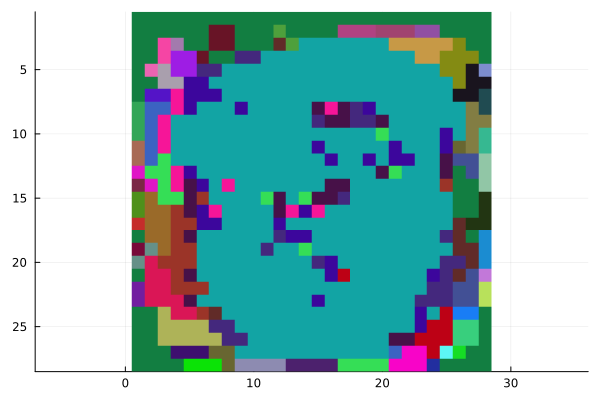

In [5]:
clusters_matrix_colors = fill(RGB(0, 0, 0), (n, n))
colors_vec = map(x->RGB(rand(1)[1], rand(1)[1], rand(1)[1]), 1:length(unique(clusters)))
for i::Int64=1:n for j::Int64=1:n
    clusters_matrix_colors[i, j] = colors_vec[clusters_matrix[i, j]]
end end
plot(clusters_matrix_colors)

Display clustering of different methods

In [6]:
function clusterdataset(g::SimpleWeightedGraph, clustering::Function)

    n::Int64 = sqrt(length(vertices(g)))

    clusters::Vector{Int64} = clustering(g)
    clusters_matrix::Matrix{Int64} = transpose(reshape(clusters, (n, n)))

    clusters_matrix_colors = fill(RGB(0, 0, 0), (n, n))
    colors_vec = map(x->RGB(rand(1)[1], rand(1)[1], rand(1)[1]), 1:length(unique(clusters)))
    for i::Int64=1:n for j::Int64=1:n
    clusters_matrix_colors[i, j] = colors_vec[clusters_matrix[i, j]]
    end end
    clusters_matrix, plot(clusters_matrix_colors, title=String(Symbol(clustering)))
end

imgs = []
#append!(imgs, [clusterdataset(dataset, modmax_clustering, d->correlation_graph(d))[2]])
append!(imgs, [clusterdataset(g, louvain_clustering)[2]])
nc_clustering_95 = g -> nc_clustering(g, α=.95)
nc_clustering_99 = g -> nc_clustering(g, α=.99)
append!(imgs, [clusterdataset(g, nc_clustering_95)[2]])
append!(imgs, [clusterdataset(g, nc_clustering_99)[2]])

┌ Warning: Note: adding edges with a zero weight to this graph type has no effect.
└ @ SimpleWeightedGraphs /Users/kozvojtex/.julia/packages/SimpleWeightedGraphs/E0rMD/src/simpleweightedgraph.jl:123


3-element Vector{Any}:
 Plot{Plots.GRBackend() n=1}
 Plot{Plots.GRBackend() n=1}
 Plot{Plots.GRBackend() n=1}

Plot heatmaps

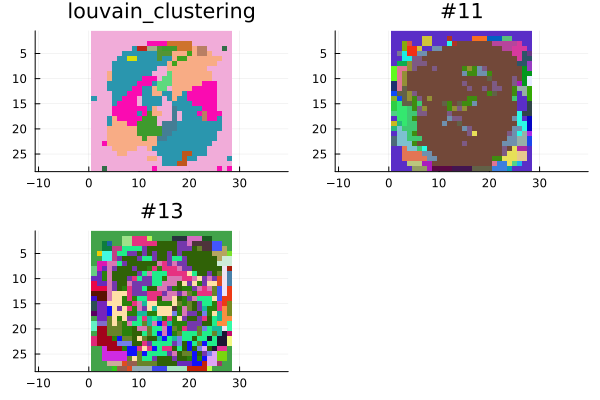

In [7]:
gr(size=(700, 700), html_output_format=:png)
plot(imgs..., layout=(2, 2))